In [1]:
# Линейна регресия за нелинейни функции
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

from sklearn.linear_model import LinearRegression

%matplotlib notebook

In [2]:
# За да видим overfitting, нека пробваме да намерим полином от осма степен за оригиналния dataset. 
linear_data = np.array([[0, 1], [2, 1.7], [8, 3], [9, 3.1], [10, 3.8]])
X, y = linear_data[:, 0:1], linear_data[:, 1]

linear_data

array([[ 0. ,  1. ],
       [ 2. ,  1.7],
       [ 8. ,  3. ],
       [ 9. ,  3.1],
       [10. ,  3.8]])

<IPython.core.display.Javascript object>


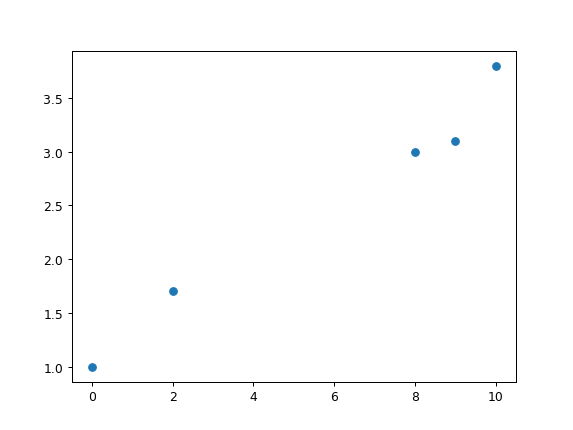

In [3]:
plt.close()
plt.scatter(X[:, 0], y)

In [4]:
# 
# Първо ще обработим оригиналните данни, създавайки нови feature и –  
# . Така входните данни ще бъдат вектори с 8 елемента, като всеки feature съответства на степен на оригиналната стойност.

X_poly = np.concatenate((X, X ** 2, X ** 3, X ** 4, X ** 5, X ** 6, X ** 7, X ** 8), axis=1)
X_poly

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 1.6000000e+01,
        3.2000000e+01, 6.4000000e+01, 1.2800000e+02, 2.5600000e+02],
       [8.0000000e+00, 6.4000000e+01, 5.1200000e+02, 4.0960000e+03,
        3.2768000e+04, 2.6214400e+05, 2.0971520e+06, 1.6777216e+07],
       [9.0000000e+00, 8.1000000e+01, 7.2900000e+02, 6.5610000e+03,
        5.9049000e+04, 5.3144100e+05, 4.7829690e+06, 4.3046721e+07],
       [1.0000000e+01, 1.0000000e+02, 1.0000000e+03, 1.0000000e+04,
        1.0000000e+05, 1.0000000e+06, 1.0000000e+07, 1.0000000e+08]])

In [5]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [6]:
[model.intercept_, model.coef_]

[0.9999999999952438,
 array([ 3.28311028e-03,  6.43300826e-03,  1.20812072e-02,  2.00031944e-02,
         2.17184447e-02, -8.86906561e-03,  1.04515266e-03, -3.96429474e-05])]

<IPython.core.display.Javascript object>


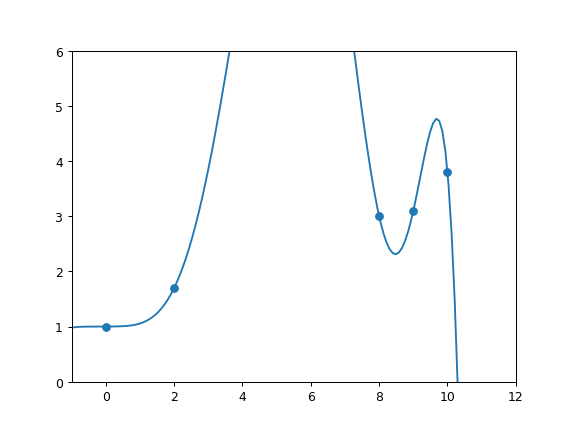

(0.0, 6.0)

In [8]:
interval = np.linspace(-2, 16, num=200)

@np.vectorize
def polynomial(x):
    return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

# plt.close()
plt.scatter(X[:, 0], y)
plt.plot(interval, polynomial(interval))
plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)

In [9]:
def draw_regularization(algorithm, alpha=1):
    model = algorithm(alpha=alpha, max_iter=100000)
    model.fit(X_poly, y)
    
    interval = np.linspace(-2, 16, num=200)

    @np.vectorize
    def polynomial(x):
        return sum(a * x**(b+1) for (b, a) in enumerate(model.coef_)) + model.intercept_

#     plt.close()
    plt.scatter(X[:, 0], y)
    plt.plot(interval, polynomial(interval))
    plt.gca().set_xlim(-1, 12); plt.gca().set_ylim(0, 6)